# Practical Application III: Comparing Classifiers

## Overview

This practical application compares the performance of several classification models—Logistic Regression, K-Nearest Neighbors, Decision Trees, and Support Vector Machines—using a real-world dataset from a Portuguese bank’s telephone-based marketing campaigns. The objective is to evaluate how effectively each model predicts whether a client will subscribe to a term deposit, while considering both predictive performance and computational cost.



## Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



## Problem 1: Understanding the Data

According to the **Materials and Methods** section of the paper, a total of **17 distinct marketing campaigns** were conducted between May 2008 and November 2010, corresponding to a total of **79,354 contacts**.

## Problem 2: Reading in the Data

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


A quick overview of the dataset shows that it cotains **21 columns**, each representing attributes related to client demographics, contact information, campaign details, and economic indicators. 

These features provide the necessary information needed to analyze and model the outcome of the bank's marketing campaigns, which is to predict whether a contact will subscribe to the bank's deposit products.

## Problem 3: Understanding the Features

We'll now examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### 3.1. Analyzing Feature Data Types

We begin by analyzing the data types of the different features.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We can see that all features are appropriately typed; so no type coercion will be needed. 

We can also see that they fall into two main categories:
- **Numeric features** (i.e. `age`, `duration`, `campaign`, `pdays`, etc.)
- **Categorical features** (i.e. `job`, `marital`, `education`, etc.)

### 3.2. Looking for Missing Values
Next, we'll look for missing values.

In [9]:
missing_values = df.isnull().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The dataset does not contain any missing values. This is a good indication of its overall quality.

However, a further review of the above data description shows that some categorical features contain a value of `unknown` (i.e. `default`, `housing`, `loan`, etc.). Rather than dropping those columns, we'll impute them during the data pre-processing phase.


### 3.3. Preventing Data Leakage

The description of the `duration` feature states that this attribute highly affects the output target (e.g., `if duration=0 then y='no'`). It also states that this attribute should be discarded if the intention is to have a realistic predictive model. This means that the `duration` column is **strongly correlated with the target feature** and will introduce data leakage if included in the training set. Therefore, it will be removed from the feature set before data split and modeling.

## Problem 4: Understanding the Task

After describing and analyzing the data, we can now clearly state the *Business Objective* of the task. That objective is **to predict whether a client will subscribe to the bank's deposi product** as a result of the bank's marketing campaigns. Eventually, the bank will be able to identify clients who are most likely to respond positively to those marketing campaigns.


## Problem 5: Engineering the Features

Now that we understand the business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

### 5.1. Selecting Features

Based on the data and business objective, the `y` feature is the target variable. In addition, we've also outlined earlier that the `duration` feature should be excluded from training since it influences the outcome and can therefore cause data leakage. Based on those pieces of information, we can create our feature and target variables.

In [10]:
# Create the features and target variables
X = df.drop(columns=['duration','y'])
y = df['y']

The feature variable now contains only data that won't create any leakage; and both feature and target variables can now be used for modeling.

We start by separating our features into numeric and categorical features.

### 5.2. Creating Numeric and Categorical Features

In [11]:
categorical_columns = X.select_dtypes(include=object).columns
numeric_columns = X.select_dtypes(exclude=object).columns

print(f'Categorical columns: {categorical_columns}')
print(f'Numeric columns: {numeric_columns}')

Categorical columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
Numeric columns: Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


We encode our categorical variables using `OneHotEncoder`. This prevents the model from assuming an order  or ranking between categories (i.e. some categories are "greater than" others) when, in fact, no such ranking actually exists.

As for our numeric variables, we'll apply a `StandardScaler` to them. This puts them all on a similar scale, ensuring that no single variable dominates the model due to its size.

### 5.3. Encoding Numeric and Categorical Variables

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create a preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('numeric', StandardScaler(), numeric_columns)
    ]
)
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')),
                                ('numeric', StandardScaler(),
                                 Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object'))])

We've now created a column transformer that will be used with our data modeling pipeline. Let's now review our target feature to see whether it requires additional preprocessing.

### 5.4. Encoding the Target Variable

As can be seen, out target variable `y` has binary values (`"yes"` and `"no"`); so it must be converted to a numeric format in order to be properly used for classification. Let's do that now.

In [13]:
# Encode the target variable to numeric format
y = y.map({ "yes": 1, "no": 0 })
y.value_counts(normalize=True)

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

Our target variable now has binary values of `"0"` and `"1"`, corresponding to `"no"` and `"yes"`, respectively. And we can confirm that the acceptance rate of **11.26%** is in line with the results of the marketing campaigns.

We've now prepared our feature and target columns with all the encoding and transformations needed for modeling. We can now proceed to creating our train/test split.

## Problem 6: Creating Train/Test Split

With our data prepared, let's now split it into a train and test set.

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

We've split our dataset according to the following rules:
- **80%** of the data is used for training
- **20%** of the data is reserved for testing
- **Stratification** is applied to preserve the original class distribution of the target variable across both datasets.

## Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifiers should aim to beat?

A simple and commonly used baseline for classification problems is the **naive classifier**. That classifier always predicts the **most frequent class** in the target variable. Our target variable has a class distribution of **88.73%** and **11.27%** for the **`no`** and **`yes`** classes, respectively. This means that our baseline model will always predict **`no`**. As a result, a model that will also predict **no** would achieve a relatively high accuracy without learning any meaningful patterns in the data.

Therefore, our baseline performance will be defined as the **accuracy obtained by predicting the majority class for all observations**. In order to be considered useful, any of the models we'll be creating must outperform this baseline model.

Let's now implement our baseline accuracy.

In [15]:
from sklearn.metrics import accuracy_score
import numpy as np

# Create a naive classifier that always predicts the majority class (0 -> 'no')
baseline_preds = np.zeros(len(y_test))

# Compute the accuracy score
baseline_accuracy = accuracy_score(y_test, baseline_preds)

print(f'Baseline accuracy: {baseline_accuracy:.4f}')

Baseline accuracy: 0.8874


Our baseline accuracy is **88.74%**. It represents the performance of a model that doesn't learn any meaningful patterns from the data. Therefore, any model that achieves an accuracy below or closer to that value will not be considered useful.

## Problem 8: Creating a Simple Model

Having established a baseline accuracy, let's now use Logistic Regression to build a basic model on your data.  

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Build the Logistic Regression pipeline
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model and make predictions
log_reg_pipeline.fit(X_train, y_train)
lr_preds = log_reg_pipeline.predict(X_test)

We've created and trained a **Logisti Regression** model as our first model. The model was created using a pipeline. Using a pipeline ensures that preprocessing steps such as categorical encoding are applied consistently to both the train and test data. This helps prevent data leakage and keeps the modeling workflow clean and reproducible.

## Problem 9: Scoring the Model

Now that we've created and trained our Logistic Regression model, let's compute its accuracy.

In [17]:
# Evaluate the performance of the model
lr_accuracy = accuracy_score(y_test, lr_preds)
print(f'Logistic Regression accuracy: {lr_accuracy:0.4f}')

Logistic Regression accuracy: 0.9009


Our Logistic Regression model has an accuracy of **90.09%**, outperforming the previously established Naive Classifier baseline.

In [18]:
# Print the classification report for them odel
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



The classification report indicates that the model performs well across both classes, demonstrating strong overall accuracy and balanced predictive performance.

## Problem 10: Comparing the Models

We'll now compare the performance of the Logistic Regression model to that of the KNN, Decision Tree, and SVM models. To do this, we create an instance of each model with its default settings, fit and score it, and store the resulting metrics in a Dataframe. This Dataframe will allow us to easily compare the performance of all models.

We begin by creating the `results` array.

### 10.1. Creating the Comparison Array

In [19]:
# Create the `results` array
results = []

With our `results` array now created, we'll update it with the metrics of the Logistic Regression model.

### 10.2. Storing the Metrics of the Logistic Regression Model

In [20]:
import time

start_time = time.time()
log_reg_pipeline.fit(X_train, y_train)
train_time = time.time() - start_time

train_accuracy = log_reg_pipeline.score(X_train, y_train)
test_accuracy = log_reg_pipeline.score(X_test, y_test)

results.append({
    'Model': 'Logistic Regression',
    'Train Time': train_time,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

Logistic Regression is used as the reference model for comparison. Its training time and accuracy score establish a baseline against which the performance of more complex models will be evaluated.

### 10.3. Storing the Metrics of the K-Nearest Neighbors (KNN) Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

start_time = time.time()
knn_pipeline.fit(X_train, y_train)
train_time = time.time() - start_time

train_accuracy = knn_pipeline.score(X_train, y_train)
test_accuracy = knn_pipeline.score(X_test, y_test)

results.append({
    'Model': 'K-Nearest Neighbors',
    'Train Time': train_time,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

The K-Nearest Neighbors (KNN) model was created using its default settings and trained using the same preprocessing and data split as the Logistic Regression model. Its training time and accuracy score are added to the results Dataframe for direct comparison.

### 10.4. Storing the Metrics of the Decision Tree Model

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

start_time = time.time()
dt_pipeline.fit(X_train, y_train)
train_time = time.time() - start_time

train_accuracy = dt_pipeline.score(X_train, y_train)
test_accuracy = dt_pipeline.score(X_test, y_test)

results.append({
    'Model': 'Decision Tree',
    'Train Time': train_time,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

The Decision Tree model was created using default settings and trained using the same preprocessing pipeline and data split as the Logistic Regression model. Its performance metrics are included in the comparison Dataframe for evaluation against the other models.

### 10.5. Storing the Metrics of the SVM Model

In [23]:
from sklearn.svm import SVC

svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

start_time = time.time()
svm_pipeline.fit(X_train, y_train)
train_time = time.time() - start_time

train_accuracy = svm_pipeline.score(X_train, y_train)
test_accuracy = svm_pipeline.score(X_test, y_test)

results.append({
    'Model': 'Support Vector Machine',
    'Train Time': train_time,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

The Support Vector Machine (SVM) model was created using default settings and trained using the same preprocessing pipeline and data split as the other models. Its metrics are added to the results DataFrame for final comparison.

### 10.6. Comparing the Models

In [24]:
# Create the results Dataframe
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.260899,0.899909,0.900947
1,K-Nearest Neighbors,0.097286,0.912200,0.897184
2,Decision Tree,0.412864,0.995417,0.839160
3,Support Vector Machine,108.316995,0.904977,0.903496


The results DataFrame shows a comparison of the training time and test accuracy for all four models. Based on these results, the **SVM** model—while slower to train—achieves the highest test accuracy at **90.34%**.

Let's plot the results for better visualization.

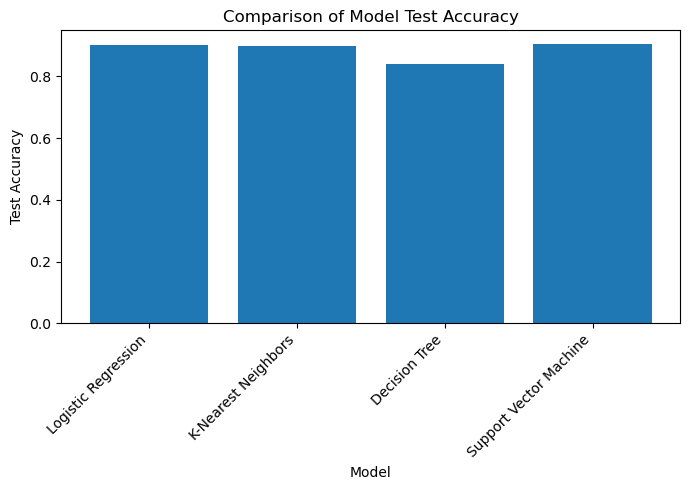

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.bar(results_df['Model'], results_df['Test Accuracy'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Test Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/model-comparison.png')
plt.show()

This bar plot compares the test accuracy of all four models, making it easy to visualize their relative performance and identify which model performs best on unseen data.

## Problem 11: Improving the Models

Now that our models have been trained and evaluated, there are clear opportunities to further improve performance.

### Hyperparameter Tuning
All models used in this project include hyperparameters that can be tuned to improve generalization. Rather than relying on default values, techniques such as **grid search** and **cross-validation** can be used to systematically explore better configurations.

Examples include:
- **KNN**: tuning the number of neighbors (`n_neighbors`)
- **Decision Trees**: controlling model complexity using parameters such as `max_depth`
- **SVM**: adjusting the regularization parameter `C` and kernel-specific settings

Careful tuning of these parameters can help reduce overfitting and improve performance on unseen data.


### Adjusting the Performance Metric

Although accuracy provides a useful baseline, it may not fully capture model performance due to class imbalance in the target variable.

Additional metrics such as **precision**, **recall**, **F1-score**, and **ROC AUC** would provide a more complete and business-relevant evaluation, particularly when the cost of different types of prediction errors is not equal.

### Summary

Future improvements would focus on hyperparameter tuning and evaluating models using alternative performance metrics. These steps would help refine model selection and better align predictions with the business objective of improving marketing efficiency.